# Chapter 5: Automating Model Selection
Figures and exercises for Chapter 5 of [Sustainable AI](https://www.oreilly.com/library/view/sustainable-ai/9781098155506/) by Raghavendra Selvan.

**To run locally without errors, clone the entire repository:** 

``` git clone https://github.com/raghavian/sustainable_ai.git ```

## **Section: Hyperparameter Optimization**
### **Figure 5-5.** The total number of hyperparameter combinations in the vertical axis plotted against increasing number of hyperparameters. Each  hyperparameter in this illustration can take two unique values.

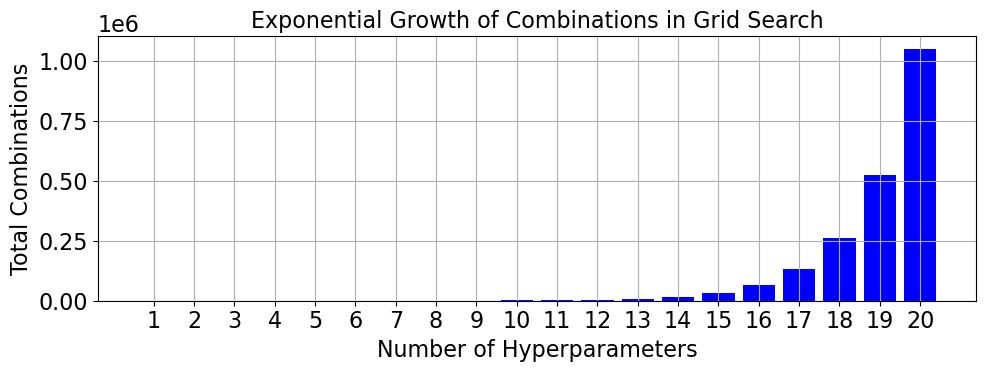

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
         }
matplotlib.rcParams.update(params)

# Number of hyperparameters
n = np.arange(1, 21,1)

# Number of values to test for each hyperparameter
k = 2  # You can change this value to see the effect

# Calculate the total number of combinations for each n
total_combinations = k**n

# Create a plot to visualize the growth
plt.figure(figsize=(10, 4))
#plt.semilogy(n, total_combinations, marker='o', linestyle='-', color='b')
plt.bar(n, total_combinations, color='b')
plt.xticks(n)
plt.xlabel('Number of Hyperparameters')
plt.ylabel('Total Combinations')
plt.title('Exponential Growth of Combinations in Grid Search')
plt.grid(True)
plt.tight_layout()

### **Figure 5-6.** Exploring all possible intercept-slope combinations to solve linear regression using grid search. Each intersection in the 2D grid evaluates a parameter combination and estimates the mean squared error.

/tmp/ipykernel_31092/708593898.py:84: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Best Mean Squared Error: 2.240809383888481
Best Parameters: Slope = 2.9 , Intercept = 4.2


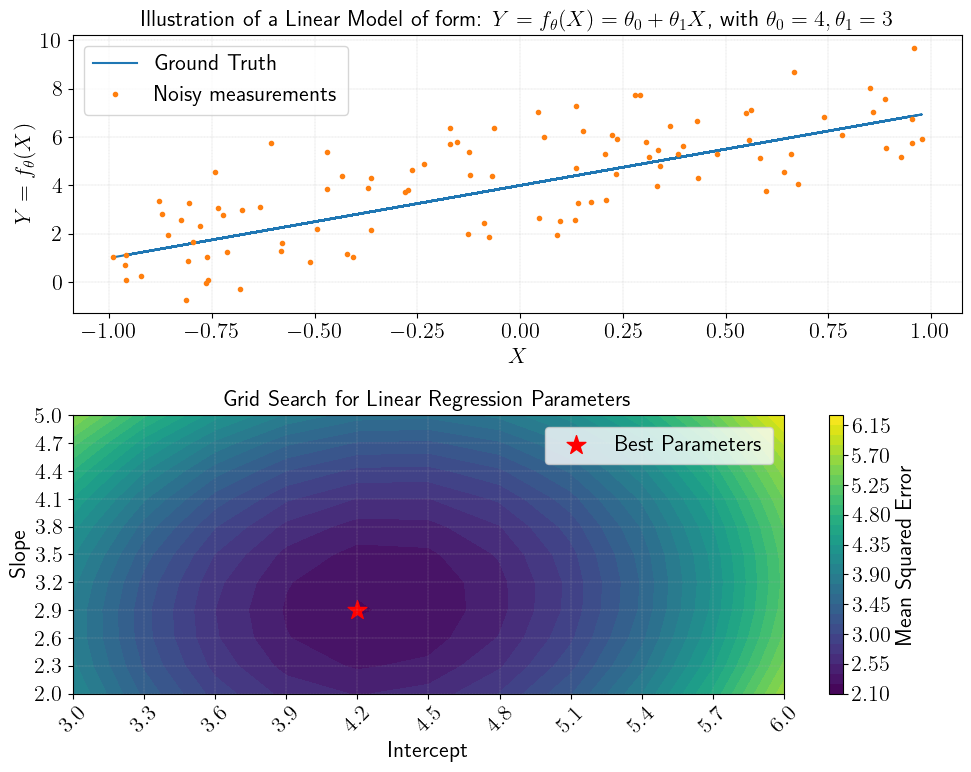

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)


# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)-1
y = 4 + 3 * X + 1.5*np.random.randn(100, 1)
plt.figure(figsize=(10,8))
plt.subplot(211)

plt.plot(X,4+3*X,label='Ground Truth')
plt.plot(X,y,'.',label='Noisy measurements')
plt.title(r'Illustration of a Linear Model of form: $Y = f_\theta(X) = \theta_0 + \theta_1 X$, with $\theta_0=4,\theta_1=3$')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.2)
plt.xlabel(r'$X$')
plt.ylabel(r'$ Y=f_{\theta}(X)$')
plt.tight_layout()

# Define the ranges for the two parameters (slope and intercept)
slope_values = np.linspace(2, 5, 11)  # Example range for slope
intercept_values = np.linspace(3, 6, 11)  # Example range for intercept

# Initialize variables to store the best result and corresponding parameters
best_mse = float('inf')  # Initialize with positive infinity for minimization tasks
best_slope = None
best_intercept = None

# Initialize a grid to store MSE values
mse_grid = np.zeros((len(slope_values), len(intercept_values)))

# Perform the 2D grid search
for i, slope in enumerate(slope_values):
    for j, intercept in enumerate(intercept_values):
        # Create and fit a linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Predict with the current slope and intercept
        y_pred = slope * X + intercept
        
        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(y, y_pred)
        
        # Update the best result if a lower MSE is found
        if mse < best_mse:
            best_mse = mse
            best_slope = slope
            best_intercept = intercept
        
        # Store the MSE value in the grid
        mse_grid[i, j] = mse

# Create a contour plot to visualize MSE values
plt.subplot(212)
contour = plt.contourf(intercept_values, slope_values, mse_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label='Mean Squared Error')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.title('Grid Search for Linear Regression Parameters')
plt.scatter(best_intercept, best_slope, color='red', marker='*', s=200,label='Best Parameters')

# Add grid lines based on parameter ranges
plt.xticks(intercept_values, rotation=45)
plt.yticks(slope_values)
plt.grid(visible=True, linestyle='--', linewidth=0.2)

plt.legend()
plt.tight_layout()

print("Best Mean Squared Error:", best_mse)
print("Best Parameters: Slope =", best_slope, ", Intercept =", best_intercept)


### **Example 5-1.** The difference between grid search and random search

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import time

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}
print("Exploring the following parameter grid:")
print(param_grid)

max_iter = 1000
cv = 5
# Create a grid search object for MLPClassifier and fit it to the data
grid_search = GridSearchCV(MLPClassifier(max_iter=max_iter), param_grid=param_grid, cv=cv)
random_search = RandomizedSearchCV(MLPClassifier(max_iter=max_iter), param_distributions=param_grid, n_iter=10, cv=cv, random_state=42)

for search_name, search in zip(['Grid','Random'],[grid_search, random_search]):

    tic = time.time()
    search.fit(X_train,y_train)
    toc = time.time()
    # Print the best hyperparameters found
    print("Best hyperparameters found via "+search_name+" search:")
    print(search.best_params_)
    print("Time to perform search: %.2f s"%(toc-tic))



Exploring the following parameter grid:
{'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 100)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'invscaling', 'adaptive']}
Best hyperparameters found via Grid search:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Time to perform search:34.74 s
Best hyperparameters found via Random search:
{'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'tanh'}
Time to perform search:5.28 s


### **Figure 5-8.** Three parameters used to design an MLP are optimized using Bayesian optimization: hidden layer sizes, learning rate, and log alpha. Within a few evaluations, the optimal model configuration that clusters around more complex models (with larger number of hidden layers) is achieved.

|   iter    |  target   |   alpha   | hidden... | learni... |
-------------------------------------------------------------
| 1         | 0.65      | -2.502    | 95.12     | 1.464     |
| 2         | 0.4417    | -1.605    | 16.45     | 0.312     |
| 3         | 0.6583    | -3.768    | 86.75     | 1.202     |
| 4         | 0.3333    | -1.168    | 3.038     | 1.94      |
| 5         | 0.3083    | -0.6702   | 22.02     | 0.3636    |
| 6         | 0.6917    | 0.0       | 77.03     | 2.0       |
| 7         | 0.5083    | -4.0      | 65.61     | 0.0       |
| 8         | 0.5333    | 0.0       | 47.9      | 2.0       |
| 9         | 0.7333    | -4.0      | 79.15     | 0.0       |
| 10        | 0.8083    | 0.0       | 82.51     | 0.0       |
| 11        | 0.7167    | -0.2085   | 99.76     | 0.4977    |
| 12        | 0.75      | 0.0       | 83.17     | 2.0       |
| 13        | 0.6167    | 0.0       | 88.04     | 0.0       |
| 14        | 0.6       | -4.0      | 37.87     | 0.0       |
| 15    

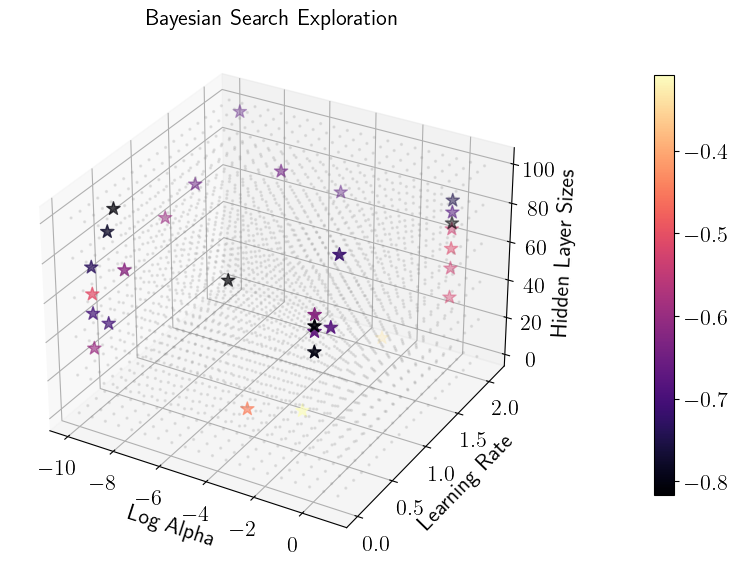

In [4]:
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from itertools import product
import matplotlib
import warnings
warnings.filterwarnings('ignore')

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)


# Load the Iris dataset and split it
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function
def objective(hidden_layer_sizes, alpha, learning_rate):
    hidden_layer_sizes = (int(hidden_layer_sizes),)  # Convert to tuple
    alpha = 10 ** alpha  # Exponentiate for log scaling

    # Cast learning_rate to appropriate type based on optimization range
    if learning_rate < 1:
        learning_rate = 'constant'
    elif 1 <= learning_rate < 2:
        learning_rate = 'invscaling'
    else:
        learning_rate = 'adaptive'

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha,
                        learning_rate=learning_rate, max_iter=30)
    score = cross_val_score(mlp, X_train, y_train, cv=5).mean()
    return score

# Define the search space
pbounds = {'hidden_layer_sizes': (1, 100),
           'alpha': (-4, 0),
           'learning_rate': (0, 2)}

# Initialize BayesianOptimization object
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, random_state=42)

# Perform Bayesian optimization
optimizer.maximize(init_points=5, n_iter=25)

# Get the points explored and their corresponding scores
explored_points = np.array([[res['params']['hidden_layer_sizes'],
                             10 ** res['params']['alpha'],
                             res['params']['learning_rate'],
                             -res['target']] for res in optimizer.res])

# Extract the individual parameter values for visualization
hidden_layer_sizes_explored = explored_points[:, 0]

alpha_explored = explored_points[:, 1]


learning_rate_explored = explored_points[:, 2]

scores_explored = explored_points[:, 3]
# Define the range of hyperparameters
hidden_layer_sizes_range = np.arange(1,110,20)
alpha_range = np.logspace(-10,1,num=20)
learning_rate_range = np.linspace(0, 2.1, num=20)

# Generate a grid of all possible hyperparameter configurations
all_configs = list(product(hidden_layer_sizes_range, alpha_range, learning_rate_range))

# Calculate scores for all configurations (may take some time for large grids)
#scores_all_configs = [objective(hls, np.log10(alpha), lr) for hls, alpha, lr in all_configs]

# Convert configurations and scores to numpy arrays for visualization
all_configs = np.array(all_configs)
#scores_all_configs = np.array(scores_all_configs)

# Visualize the exploration of hyperparameters
fig = plt.figure(figsize=(10, 6))

# Plot for alpha vs learning_rate with low transparency representing all configs
ax1 = fig.add_subplot(111, projection='3d')
sc1 = ax1.scatter(np.log10(all_configs[:, 1]), all_configs[:, 2], all_configs[:, 0], c='gray', alpha=0.15,s=2)
sc2 = ax1.scatter(np.log(alpha_explored), learning_rate_explored, hidden_layer_sizes_explored, c=scores_explored, cmap='magma',marker='*',s=100)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
plt.colorbar(sc2, cax=cbar_ax)
#ax1.colorbar()
#plt.colorbar()
ax1.set_xlabel('Log Alpha')
ax1.set_ylabel('Learning Rate')
ax1.set_zlabel('Hidden Layer Sizes')
ax1.set_title('Bayesian Search Exploration')
plt.tight_layout()
plt.show()
